In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import calendar
from datetime import datetime
sns.set()
os.chdir('C:/代码方案/Bike')
%matplotlib inline
%config InlineBackend.figure_format='retina' #lodaing package to analyze data

# Data Resource is from Kaggle

## Data Description
### seaon data inculding 4 level (1,4) which is 1 spring, 2 summer, 3 fall, 4 winter
### holiday is 2 level, 0 is normal, 1 is holiday
### workingday is 2 level, 0 is weekend, 1 is weekday
### weather is 4 level, 1 sunny, 2 cloudy, 3 rainly, 4 bad (rainstorm,snowstorm,windstorm)
### temp is temperature
### atemp is somatosensory temperature

In [2]:
df = pd.read_csv('bike-sharing.csv') #lodaing data

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.info() #data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.isnull().sum()# checking missing value

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
df.describe() #data summary

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## split the datetime to seperate as date, hour, dayname, month

In [7]:
df['date'] = df.datetime.apply(lambda x: x.split()[0])
df['hour'] = df.datetime.apply(lambda x: x.split()[1].split(':')[0])
datestring = df.datetime[1].split()[0] 

In [8]:
df['weekday'] = df.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
df['month'] =df.date.apply(lambda dateString:  calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month] ) 

In [9]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


## Convert the value to String

In [10]:
df['season'] =df.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [11]:
df['weather'] = df.weather.map({1:'sunny',2:'cloudy',3:'rainly',4:'bad'})
df['holiday'] = df['holiday'].map({0:'normal',1:'holiday'})
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,2011-01-01 00:00:00,spring,normal,0,sunny,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,2011-01-01 01:00:00,spring,normal,0,sunny,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,2011-01-01 02:00:00,spring,normal,0,sunny,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,2011-01-01 03:00:00,spring,normal,0,sunny,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,2011-01-01 04:00:00,spring,normal,0,sunny,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


<AxesSubplot:>

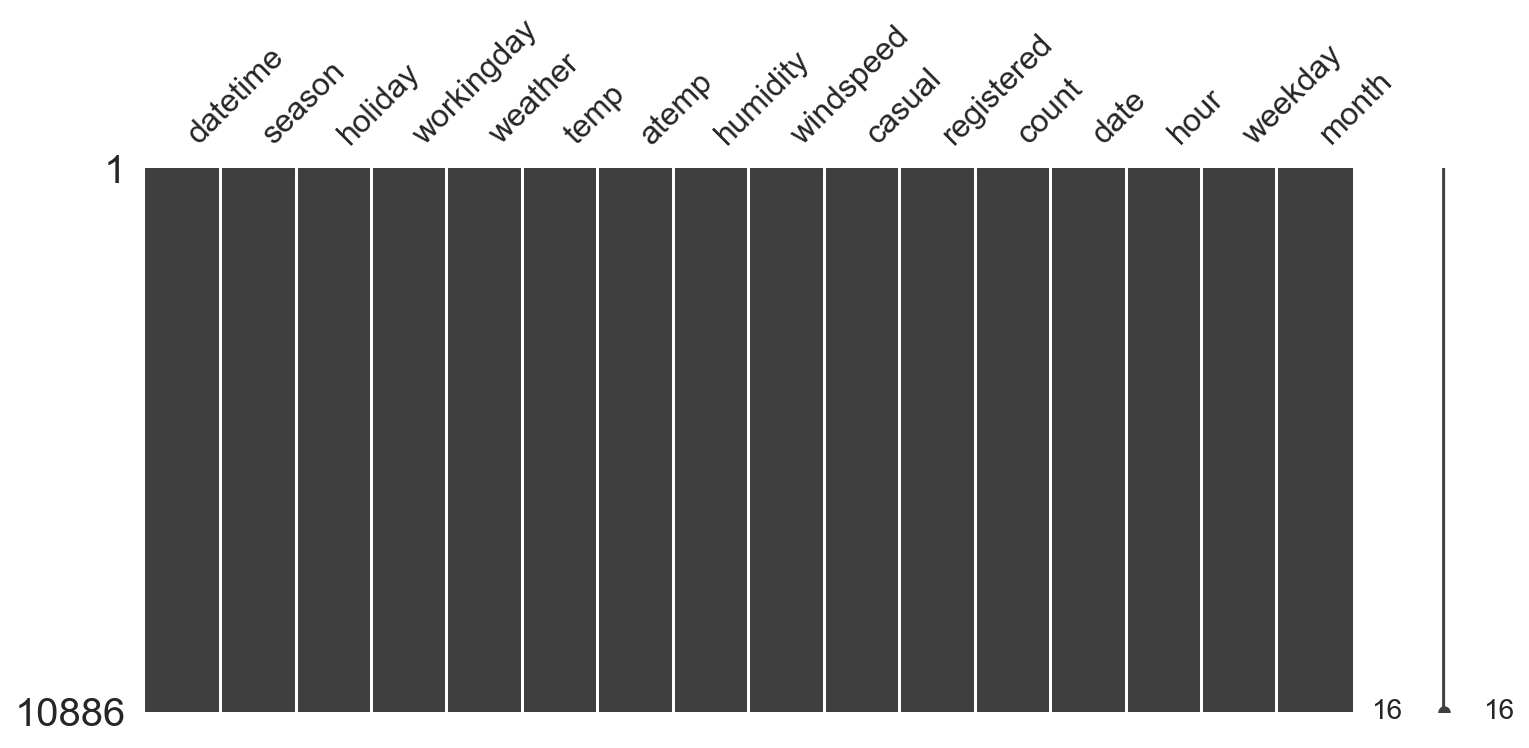

In [12]:
msno.matrix(df,figsize=(12,5))  #visualization for checking missing value

## Insight
### The heat-map shows the correlationship between the columns we selected. The count, registered, and casual are positive correlation. The corrleation is postive 0.69 and 0.97 dependented on count = casual + registered.
### count and temperature are also positive as 0.39. The outcome shows that with increased temperature 1, the effect will be 0.39 associated with count.
### count and humidity are negative correlation. outcome impacts if humidity is increased, people will not be using bike, also have to consider the temperature.
### windspped seems not effect with people using bike as long as it is not windstorm.

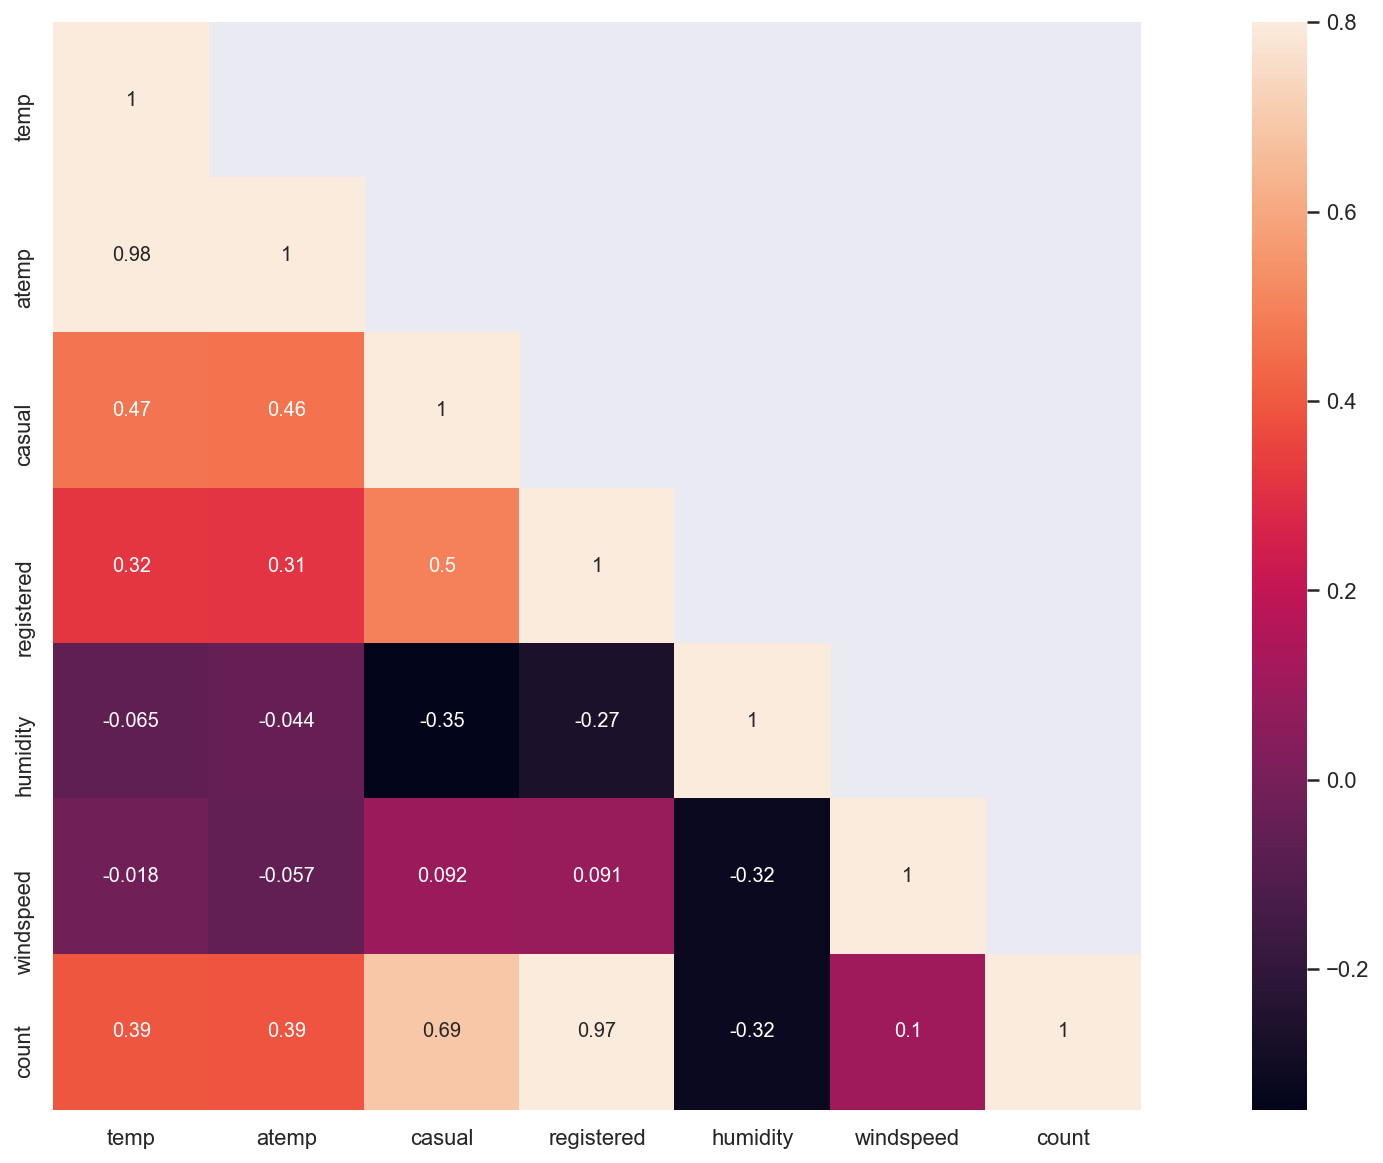

In [13]:
correlation = df[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(correlation, mask=mask,vmax=.8, square=True,annot=True)
plt.show() # provide heat-map

#### creating the data visualization

<AxesSubplot:ylabel='count'>

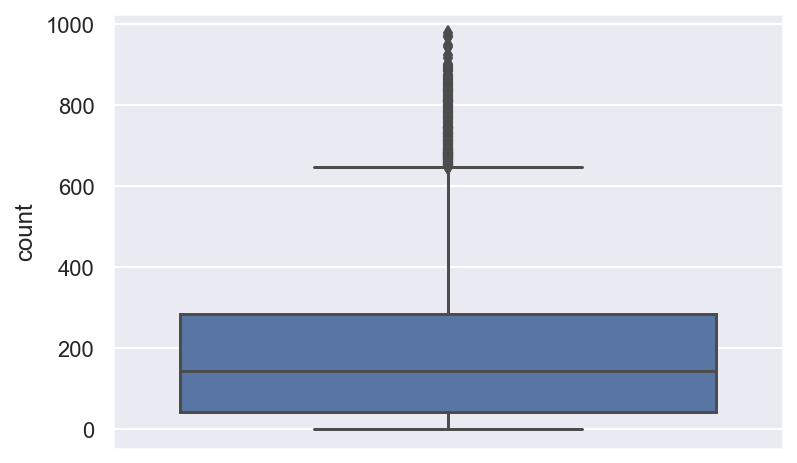

In [14]:
sns.boxplot(data=df,y='count',orient='v')

<AxesSubplot:xlabel='hour', ylabel='count'>

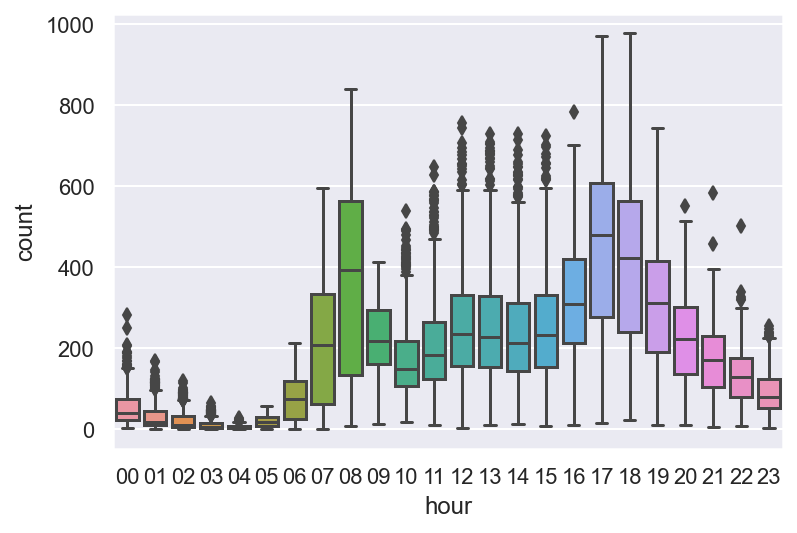

In [15]:
sns.boxplot(data=df,y='count',x='hour',orient='v')

<AxesSubplot:xlabel='workingday', ylabel='count'>

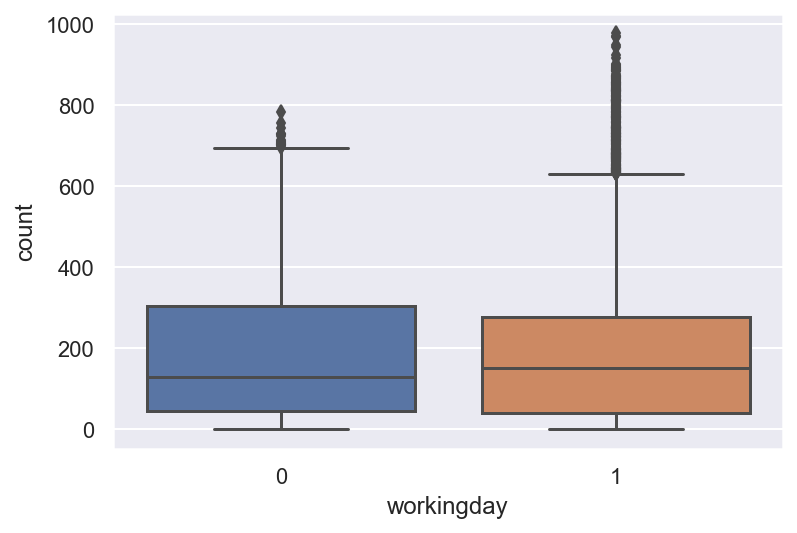

In [16]:
sns.boxplot(data=df,y='count',x='workingday',orient='v')

<AxesSubplot:xlabel='season', ylabel='count'>

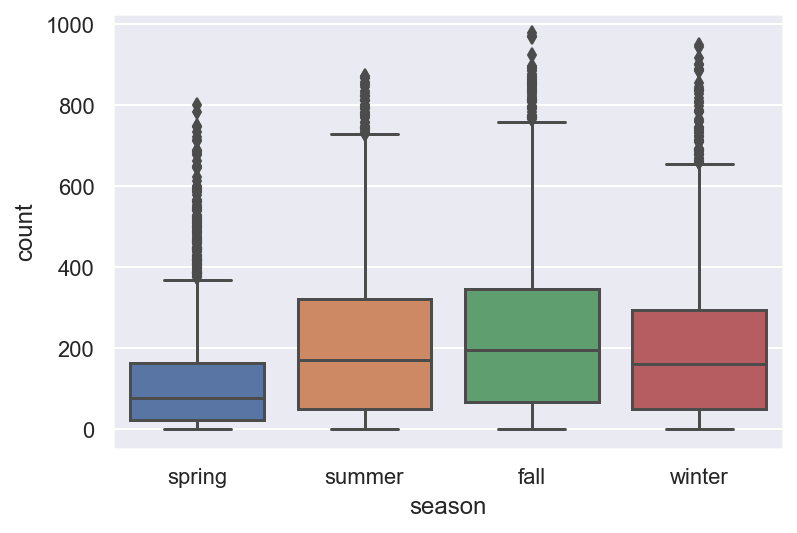

In [17]:
sns.boxplot(data=df,y='count',x='season',orient='v')

### More data visualization to display the relationship between the considering columns. Altough have much outliners, the box-plot on count could be showing quartiles. the season is fall most people using bike, and spring is least.  Graph 3 is showing hour for people using bike. higher counting on 8am and 6pm, seems bike is main traffic to communicated with their job place.

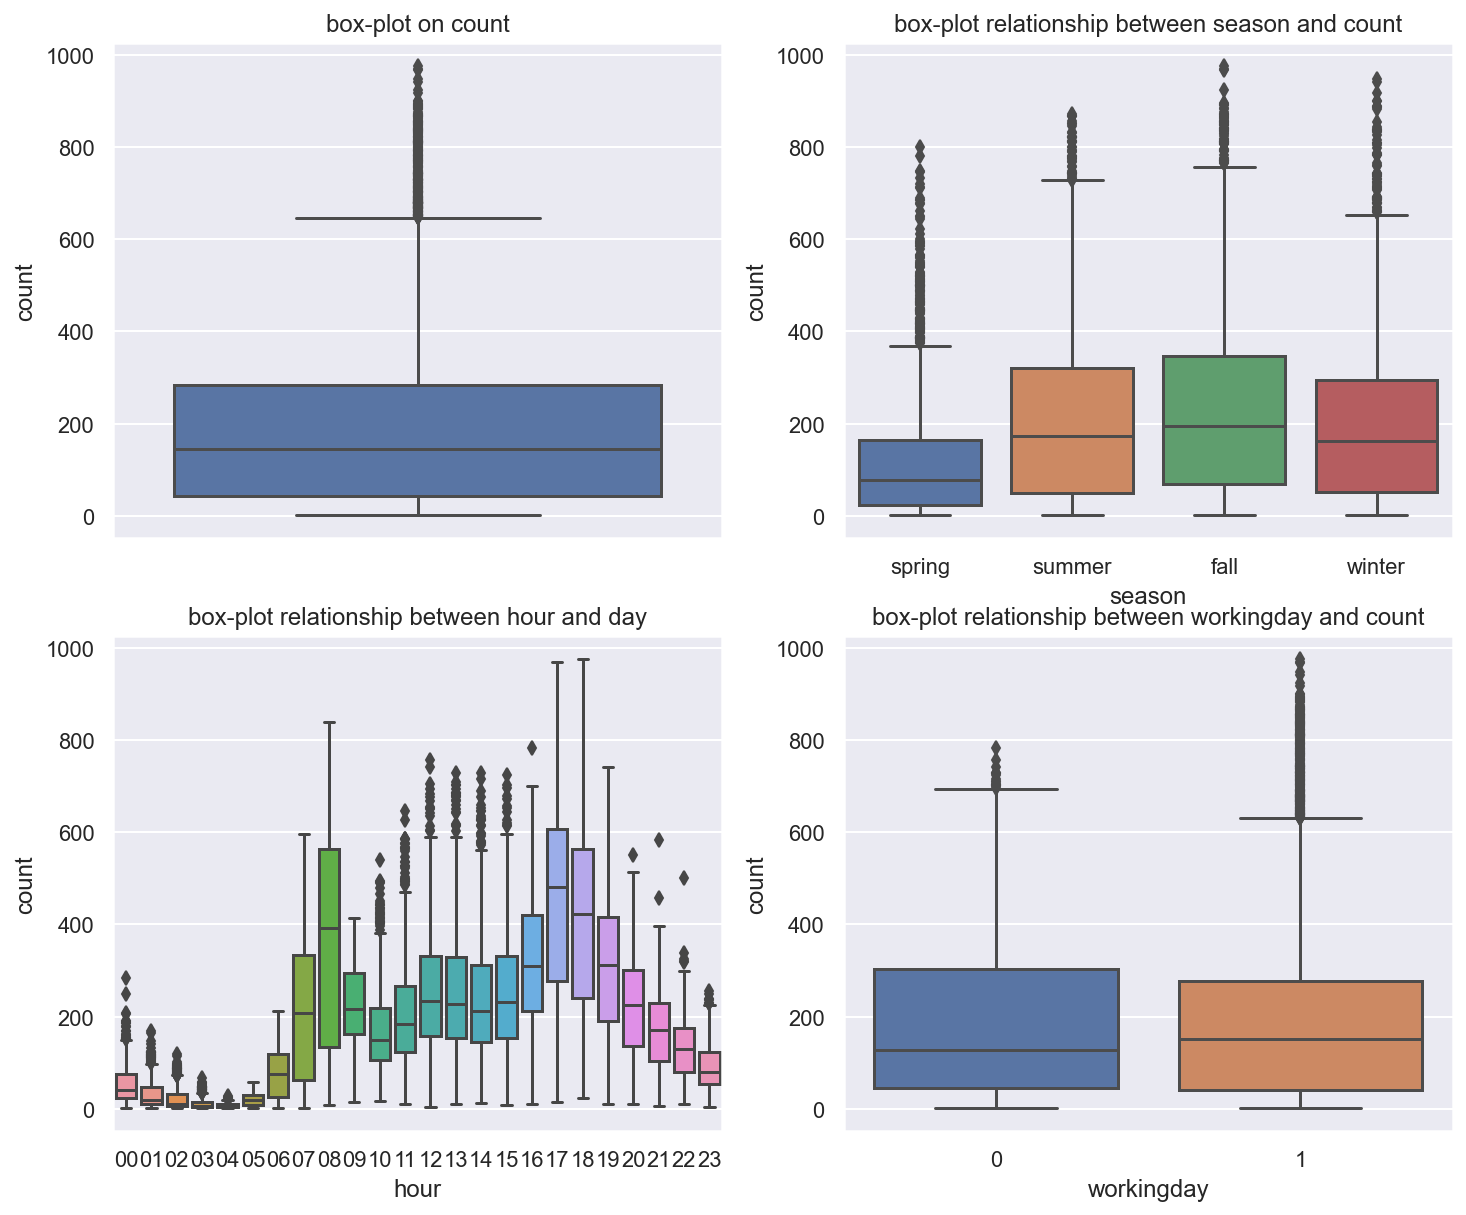

In [18]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=df,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=df,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=df,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=df,y="count",x="workingday",orient="v",ax=axes[1][1])
#adding the label to each graph
axes[0][0].set(ylabel='count',title="box-plot on count")
axes[0][1].set(xlabel='season', ylabel='count',title="box-plot relationship between season and count")
axes[1][0].set(xlabel='hour', ylabel='count',title="box-plot relationship between hour and day")
axes[1][1].set(xlabel='workingday', ylabel='count',title="box-plot relationship between workingday and count")
plt.show()

C:\Users\Show\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Show\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Show\anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


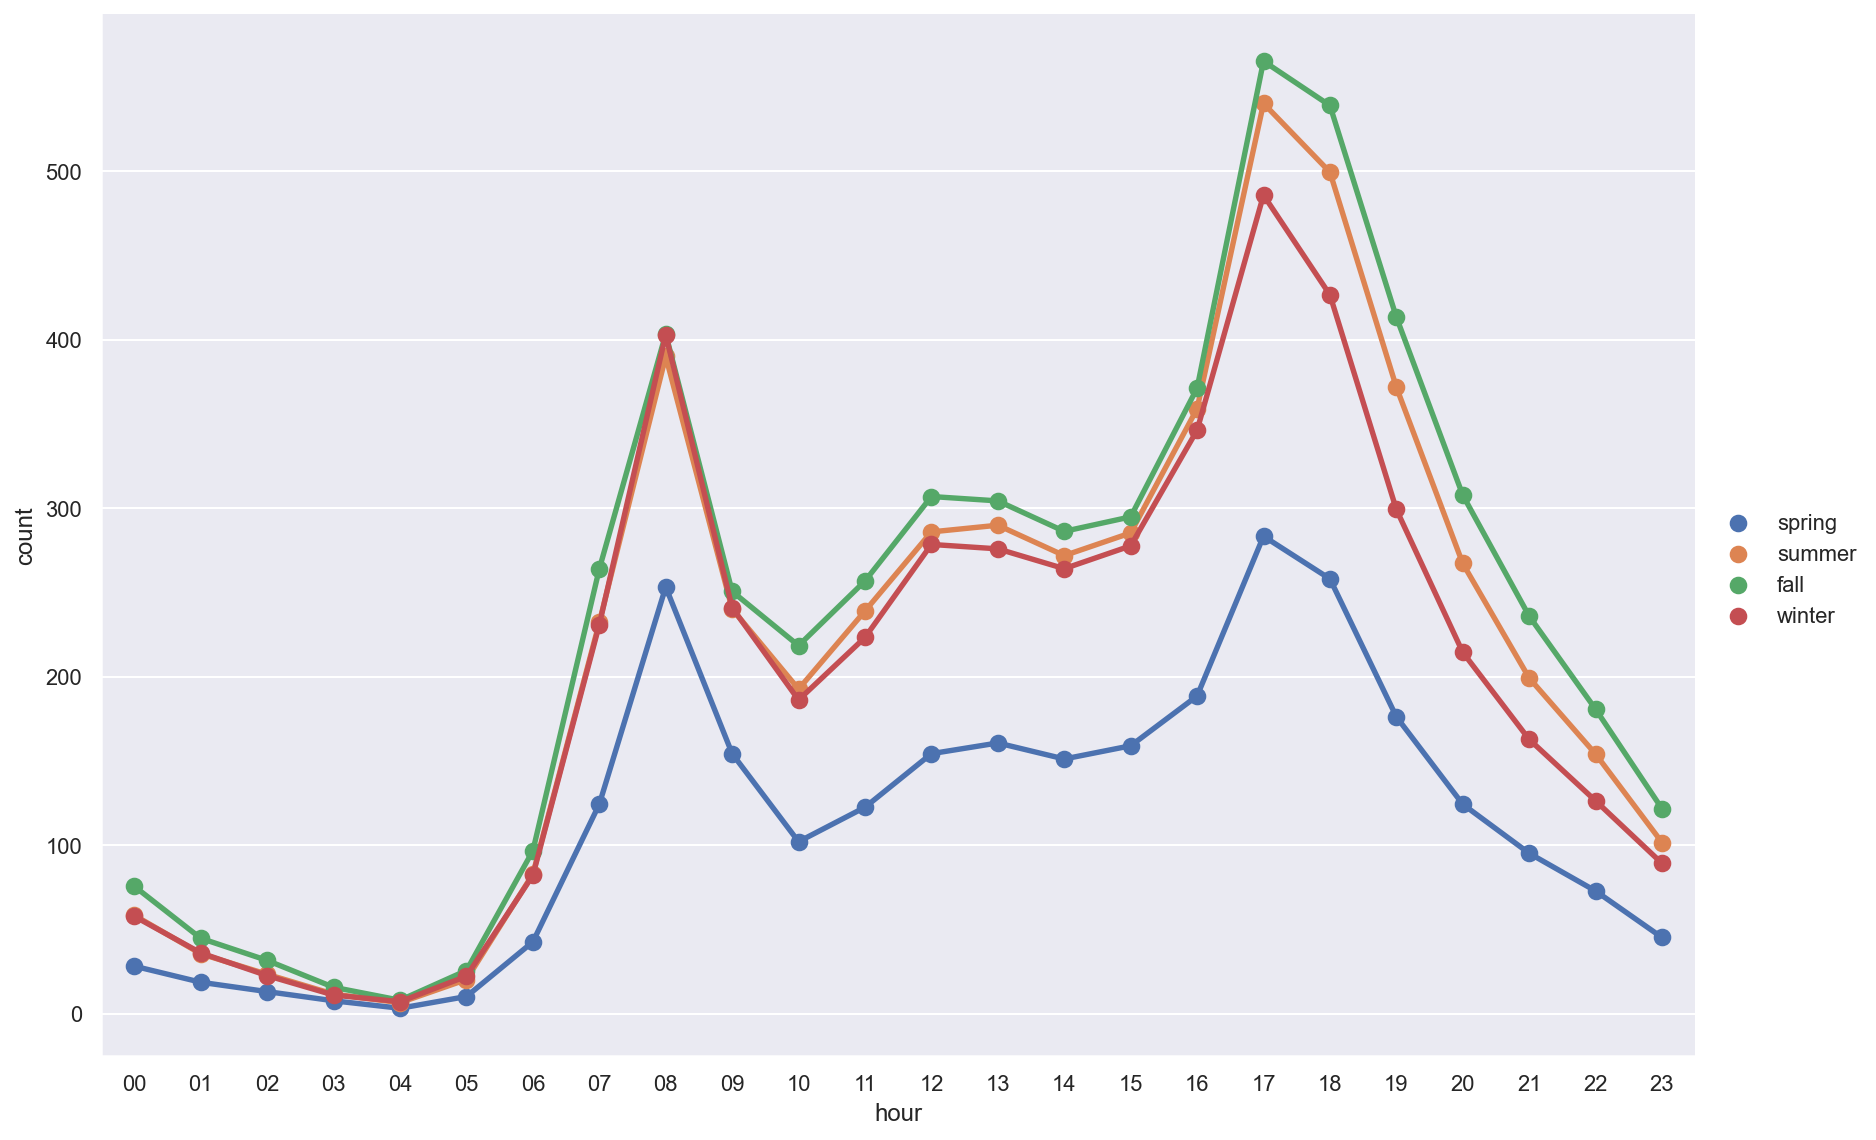

In [19]:
sns.FacetGrid(data=df,size=8,aspect=1.5).\
map(sns.pointplot,'hour','count','season',palette="deep",ci=None).\
add_legend()
plt.show()

In [20]:
df["humidity_band"] = pd.cut(df['humidity'],5)
df["temp_band"] = pd.cut(df["temp"],5)

### Which temperature and humidity get most people using bike sharing.

C:\Users\Show\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Show\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Show\anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


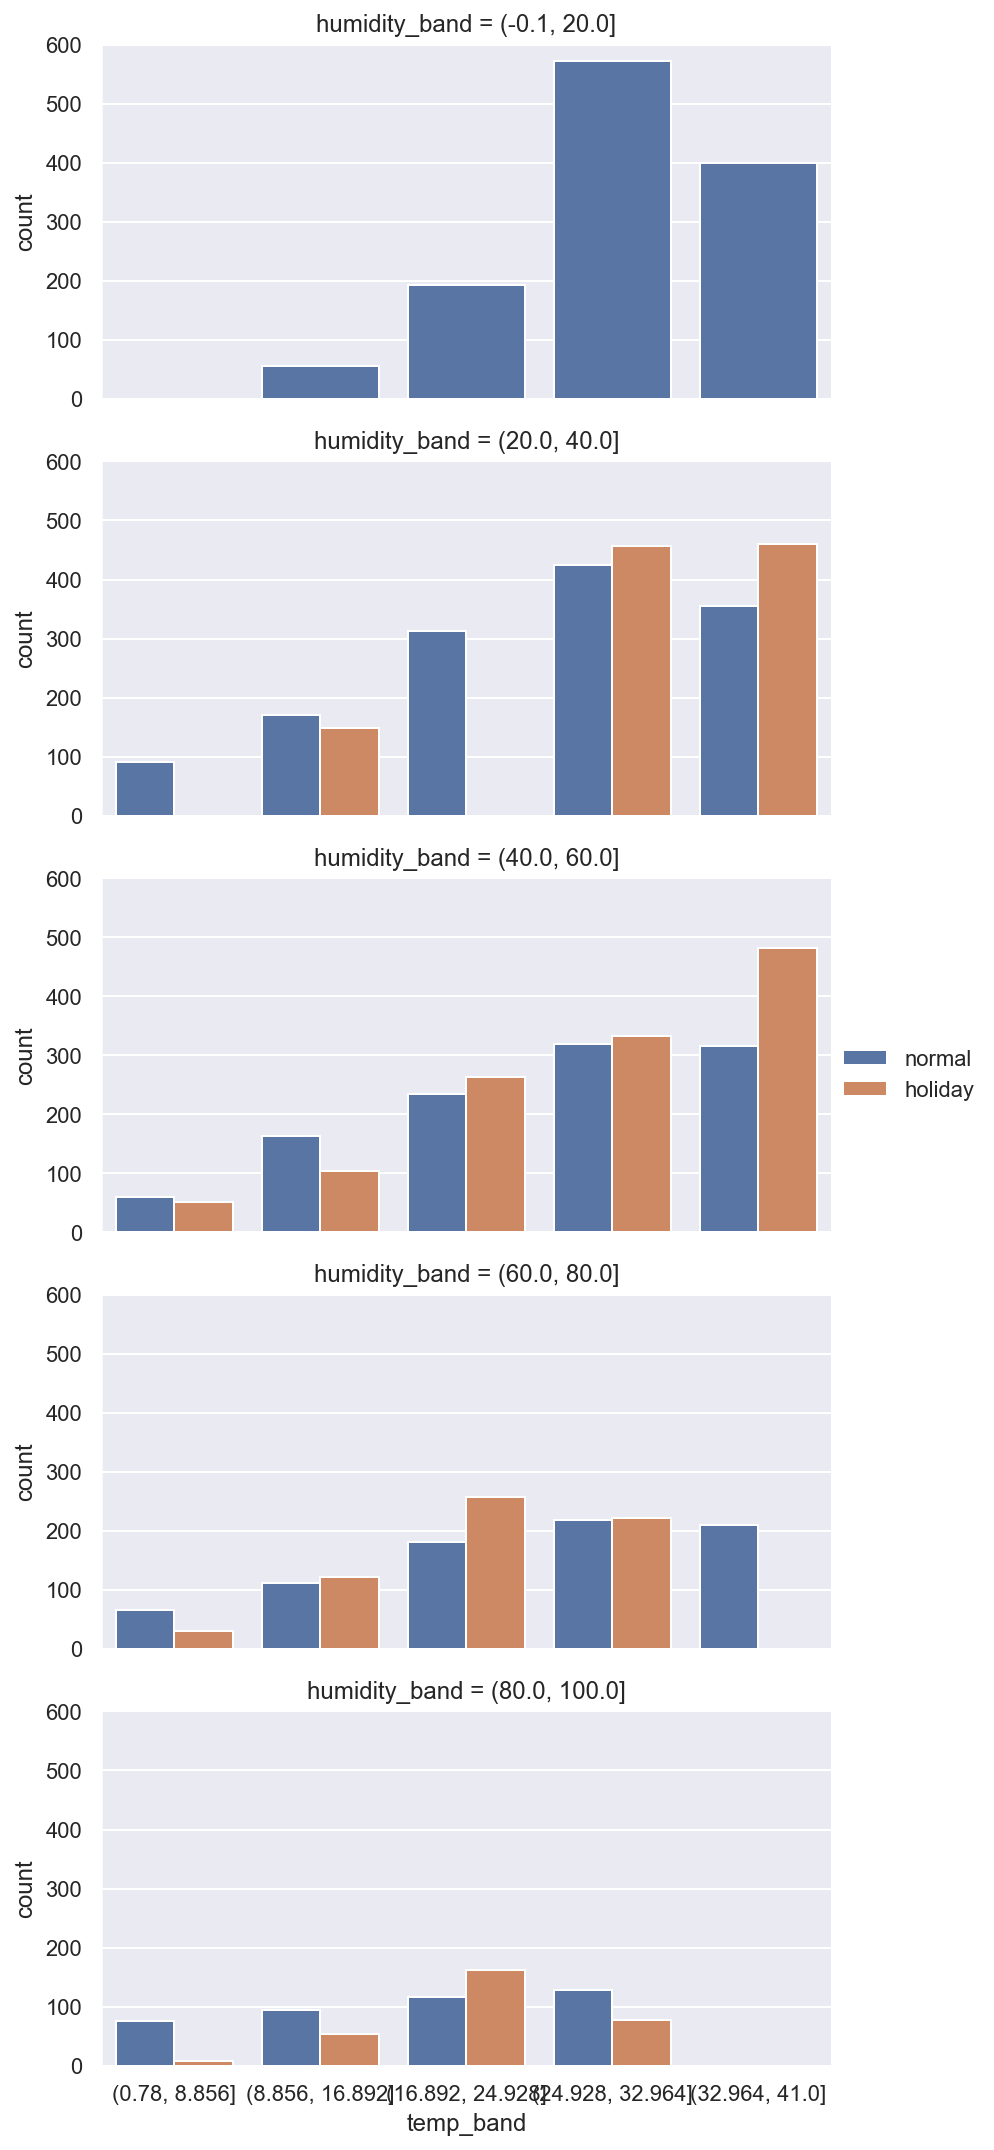

In [21]:
sns.FacetGrid(data=df,row="humidity_band",size=3,aspect=2).\
map(sns.barplot,'temp_band','count','holiday',palette='deep',ci=None).\
add_legend()
plt.show()

### Dependent on the different weather, how change rate for the people using bike shring per month.

C:\Users\Show\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Show\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Show\anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


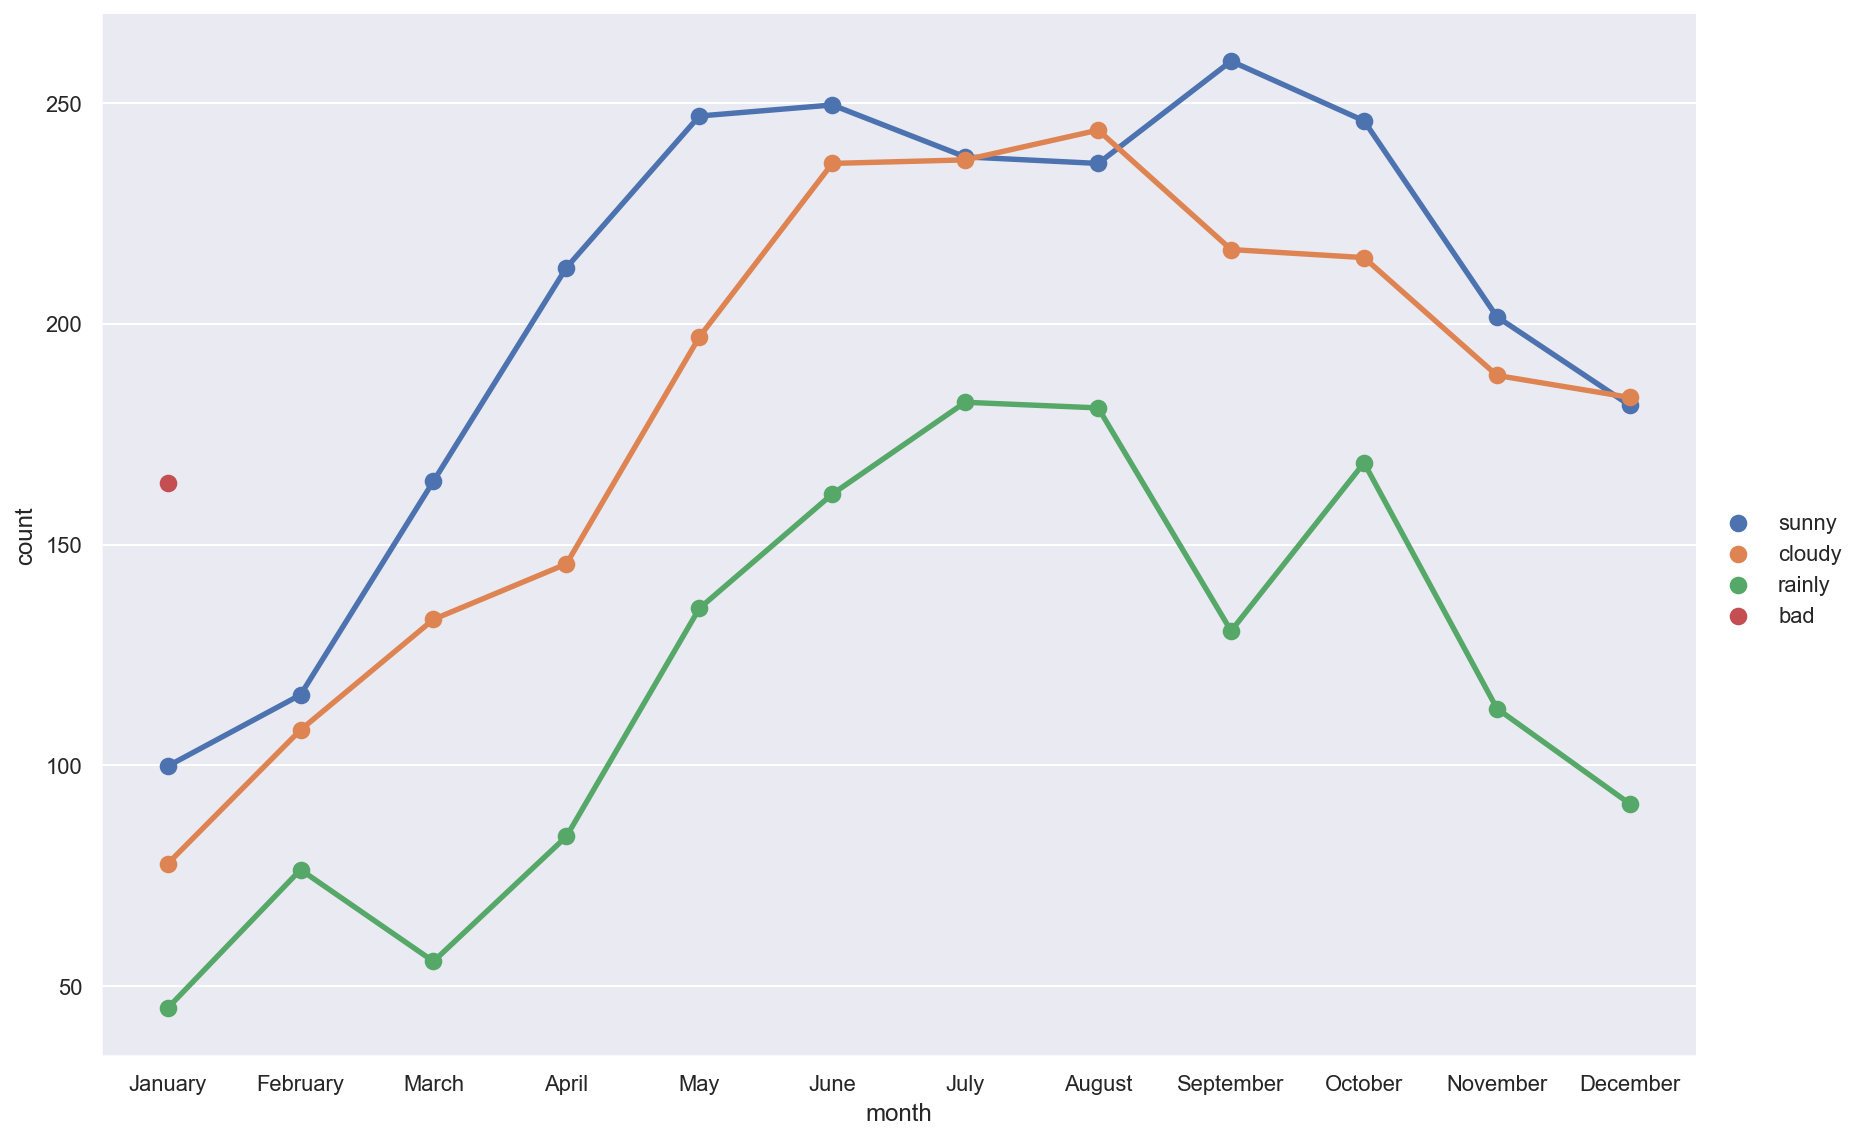

In [22]:
sns.FacetGrid(data=df,size=8,aspect=1.5).\
map(sns.pointplot,'month','count','weather',palette="deep",ci=None).\
add_legend()
plt.show()

### Dependent on the week, How change rate of people use bike sharing with hour.

C:\Users\Show\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Show\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Show\anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


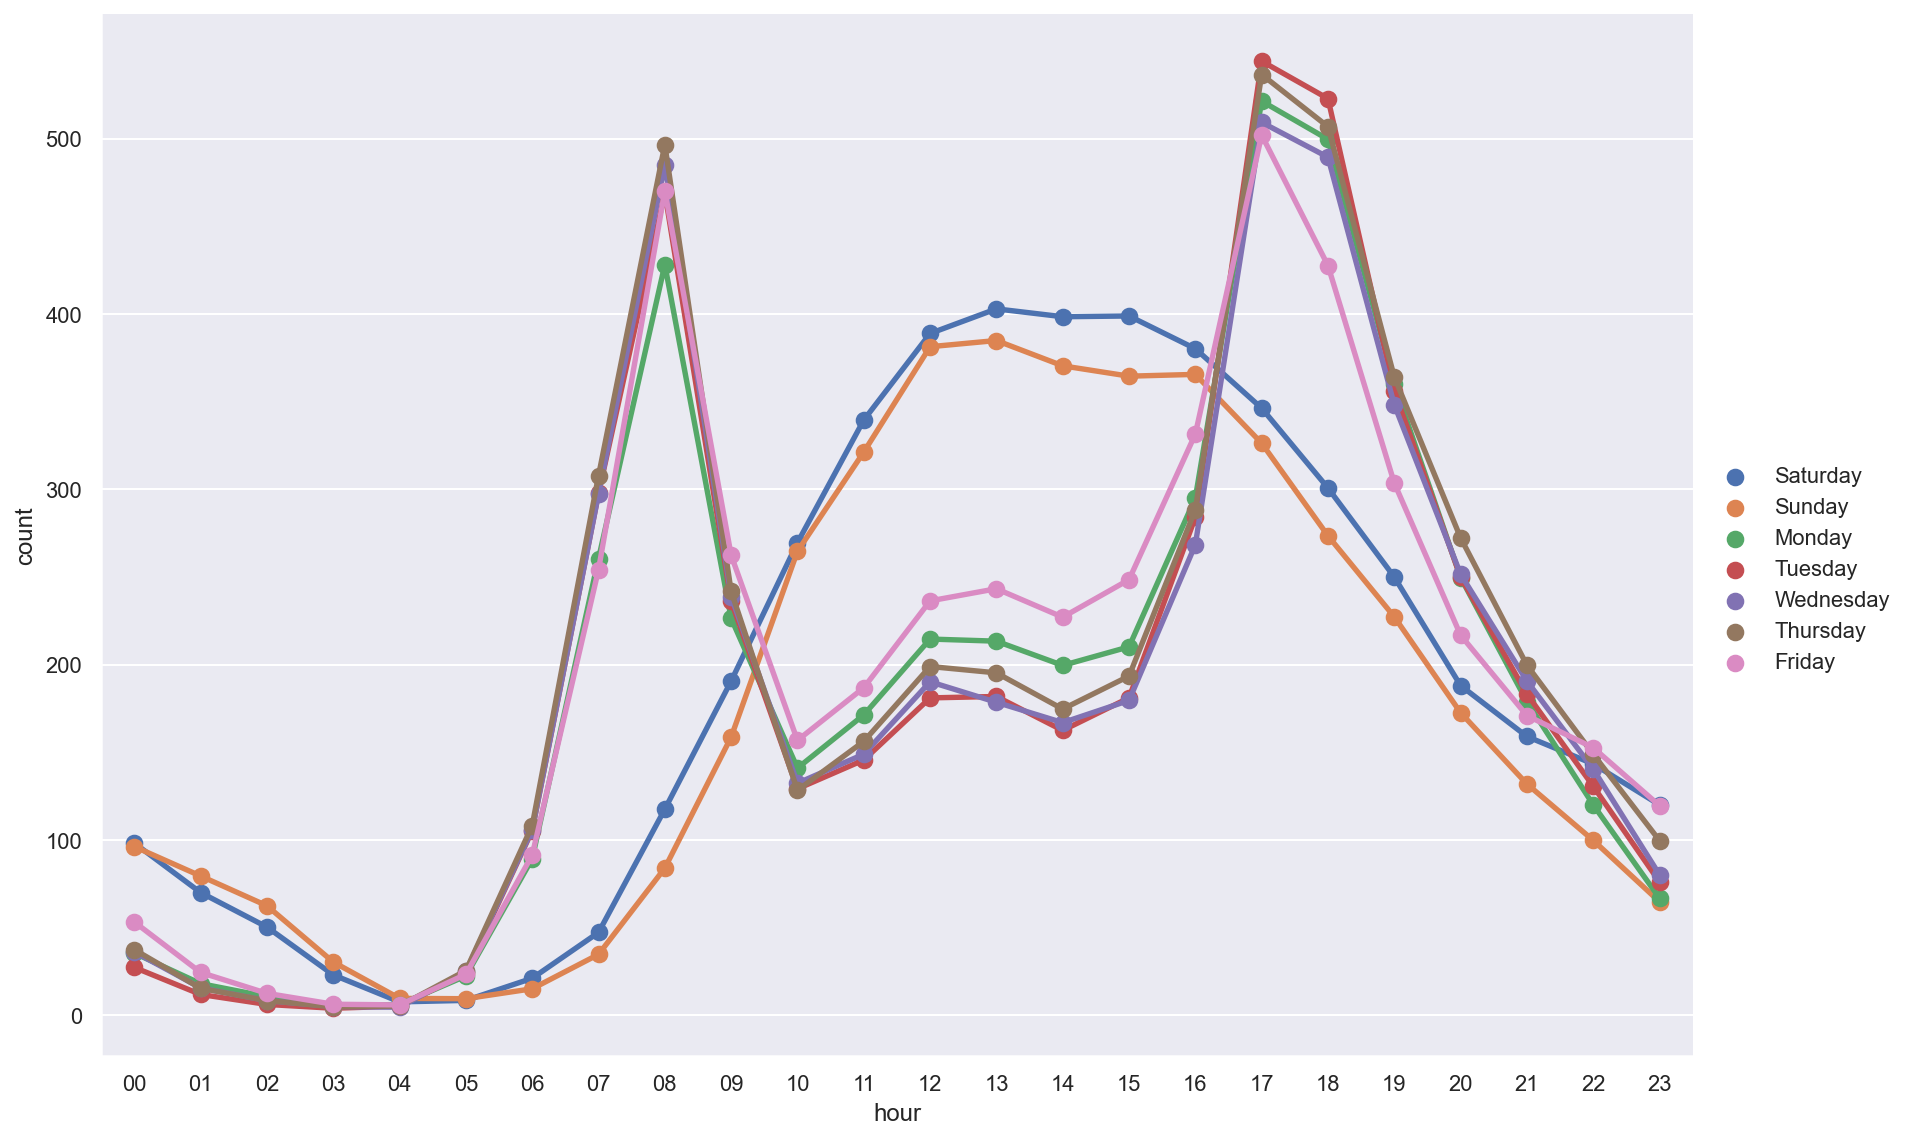

In [23]:
sns.FacetGrid(data=df,size=8,aspect=1.5).\
map(sns.pointplot,'hour','count','weekday',palette="deep",ci=None).\
add_legend()
plt.show()